In [1]:
import gaussian_random_fields as gr
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from PIL import Image
import torch
from ddpm import *

The cell below generates 'n' samples from the diffusion model with model parameters stored at 'model_path' model file. Also change the 'tau' value (the parameter for gaussian random field correlation) according to the model file chosen since there are seperate model parameter files for every GRF parameter.   

In [3]:
model_path = 'model_tau=0.2.pt'
tau = 0.2
n = 10

device = torch.device('cpu')
model = UNet(device = device, c_in=1, c_out=1).to(device)
diffusion = Diffusion(img_size=28, device=device, channels=1, tau=tau)
model.load_state_dict(torch.load(model_path, 
           map_location=device))
model.eval()
samples = diffusion.sample(model, n)


03:29:14 - INFO: Sampling 10 new images....
/home/rishabh/anaconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642881969/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
199it [01:03,  3.13it/s]


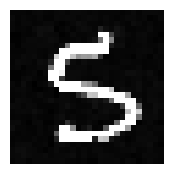

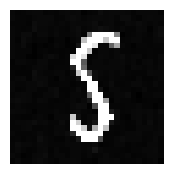

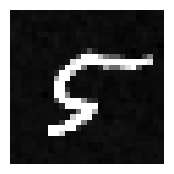

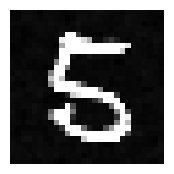

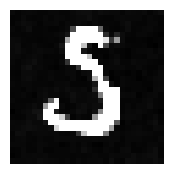

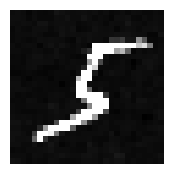

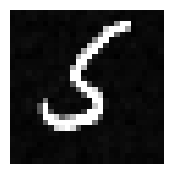

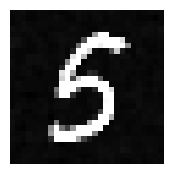

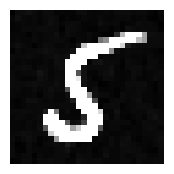

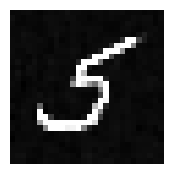

In [16]:
for i in range(n):
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(samples[i,0], cmap='gray')

If you want to train the model again, run the code below. The launch() function kicks the training process, set the number of epochs with 'epochs', the 'batch_size' of the training, and the parameter for the gaussian random field 'tau'.
Note that the model file generated from this training will be named 'model.pt', so repeat the above code after training for generating samples, by setting model_path='model.pt'

In [ ]:
epochs=300
batch_size=12
tau=0.2

launch(epochs=epochs, batch_size=batch_size, device='cpu', tau=tau)

Below, Gaussian random fields of size 28x28 are plotted for different parameters of the noise refered to as 'tau' in the above cells

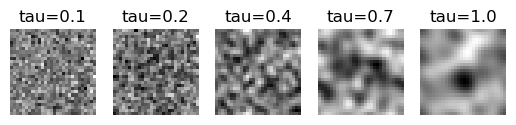

In [23]:
tau = [0.1, 0.2, 0.4, 0.7, 1.0]

for i in range(len(tau)):
    ax = plt.subplot(1,len(tau),i+1)
    ax.set_axis_off()
    ax.set_title('tau='+str(tau[i]))
    ax.imshow(gr.gaussian_random_field(alpha = tau[i], samples = 1, size = 28)[0,0], cmap='gray')
    